# SBA National Loan Analysis

# Modeling - Part 3 - XGBoosting Classifier

## Table of Contents

1. Imports
2. Previewing Data
3. Preprocessing Data
    1. Standard Scaler
    2. Robust Scaler
4. Evaluation Metrics
5. Simple Model
    1. Standard Scaler
    2. Robust Scaler
6. Grid Search
    1. Standard Scaler
    2. Robust Scaler
7. Bayesian Optimization
    1. Standard Scaler
    2. Robust Scaler
8. Save Results
    

## 1. Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from xgboost import XGBClassifier

from library.preprocessing import processing_pipeline
from library.modeling import (createModel, createClassificationMetrics,
                             runGridSearchAnalysis, createConfusionMatrix, createFeatureImportanceChart,
                             appendModelingResults, drawRocCurve, obtain_best_bayes_model)

In [57]:
f = open('./results/best_params.json')
data = json.load(f)
best_model_params = dict(data)

In [3]:
model_results = pd.read_csv('./results/model_results.csv')
new_model_results = []

## 2. Previewing Data

In [4]:
sba_loans = pd.read_csv('./../data/processed/sba_national_processed_final.csv')

pd.set_option('display.max_columns', None)

In [5]:
sba_loans.head()

,Term,NoEmp,CreateJob,RetainedJob,DisbursementGross,GrAppv,SBA_Appv,NAICS_sectors,unemployment_rate,gdp_growth,gdp_annual_change,inflation_rate,inf_rate_annual_chg,NewExist_existing_business,NewExist_new_business,UrbanRural_rural,UrbanRural_urban,isFranchise_not_franchise,RevLineCr_v2_N,RevLineCr_v2_Y,LowDoc_v2_N,LowDoc_v2_Y,MIS_Status_v2_default,state_top10
0,84,4,0,0,60000.0,60000.0,48000.0,45,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
1,60,2,0,0,40000.0,40000.0,32000.0,72,3.5,4.4472,0.67,2.3377,-0.59,0,1,0,0,1,1,0,0,1,0,0
2,180,7,0,0,287000.0,287000.0,215250.0,62,3.5,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,0
3,60,2,0,0,35000.0,35000.0,28000.0,0,4.1,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,0,1,0,0
4,240,14,7,7,229000.0,229000.0,229000.0,0,4.8,4.4472,0.67,2.3377,-0.59,1,0,0,0,1,1,0,1,0,0,1


## 3. Preprocessing Data

In [6]:
target = 'MIS_Status_v2_default'
features = sba_loans.drop(columns='MIS_Status_v2_default', axis=1).columns

### A. Standard Scaler

In [7]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = processing_pipeline(sba_loans, target)

### B. Robust Scaler

In [8]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = processing_pipeline(sba_loans, target, scaler='Robust')

## 4. Evaluation Metrics

The following evlaution metrics will be used to evaluate the effectiveness of the logistic models.

**Accuracy Score**

Blurb about accuracy score.

**Classifiation Report**

Blurb about Classification Report

**Matthew's Correlation Coefficient**

Blurb about MCC

**F1 Score**

Blurb about F1 Score and why it will be the main metric for evaluation

## 5. Simple Model

### A. Standard Scaler

In [9]:
xgb_ss_mod1 = XGBClassifier(random_state=42, verbosity=0)
y_pred = createModel(xgb_ss_mod1, X_train_ss, y_train_ss, X_test_ss)

In [10]:
metrics = createClassificationMetrics(y_pred, y_test_ss)

In [11]:
print('Accuracy Score: ' + str(round(metrics['acc'], 4)))

Accuracy Score: 0.9483


In [12]:
print('Classification Report: \n' + metrics['cr'])

Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223925
     default       0.83      0.87      0.85     44929

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854



In [13]:
print('Matthew\'s Correlation Coefficient: ' + str(round(metrics['mcc'],4)))

Matthew's Correlation Coefficient: 0.818


In [14]:
print('F1 Score: ' + str(round(metrics['f1'], 4)))a

F1 Score: 0.8489


### B. Robust Scaler

In [15]:
xgbc_rs_mod1 = XGBClassifier(random_state=42, verbosity=0)
y_pred = createModel(xgbc_rs_mod1, X_train_rs, y_train_rs, X_test_rs)

In [16]:
metrics = createClassificationMetrics(y_pred, y_test_rs)

In [17]:
print('Accuracy Score: ' + str(round(metrics['acc'], 4)))

Accuracy Score: 0.9483


In [18]:
print('Classification Report: \n' + metrics['cr'])

Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223925
     default       0.83      0.87      0.85     44929

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854



In [19]:
print('Matthew\'s Correlation Coefficient: ' + str(round(metrics['mcc'],4)))

Matthew's Correlation Coefficient: 0.818


In [20]:
print('F1 Score: ' + str(round(metrics['f1'], 4)))

F1 Score: 0.8489


## 6. Grid Search Cross Validation

In [21]:
param_grid = {
    'learning_rate': [0.1, 1],
    'n_estimators': [50, 100],
    'max_depth': [3, 10]
}

### A. Standard Scaler

In [22]:
mod_info = {
    'model': 'XGBoost',
    'method': 'Grid Search',
    'scaler': 'Standard'
}

In [23]:
xgbc = XGBClassifier(random_state=42, verbosity=0)
xgbc_ss_best_params, y_pred = runGridSearchAnalysis(xgbc, param_grid, X_train_ss, y_train_ss, X_test_ss)

**Evaluation Metrics**

In [24]:
metrics = createClassificationMetrics(y_pred, y_test_ss)
print('Accuracy Score: {}'.format(metrics['acc']))
print('Classification Report: \n{}'.format(metrics['cr']))
print('Matthew\'s Correlation Coefficient: {}'.format(metrics['mcc']))
print('F1 Score: {}'.format(metrics['f1']))

Accuracy Score: 0.9493702901946781
Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223951
     default       0.83      0.87      0.85     44903

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854

Matthew's Correlation Coefficient: 0.8216896937293268
F1 Score: 0.8518921506756905


**Confusion Matrix**

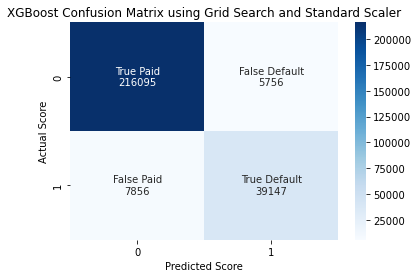

In [25]:
matrix = createConfusionMatrix(y_test_ss, y_pred, mod_info)

**ROC Curve**

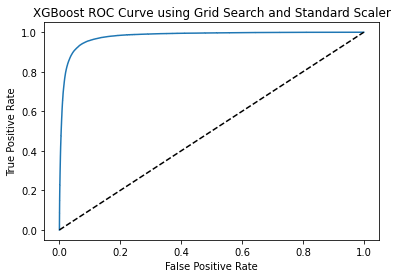

In [26]:
xgb_mod = XGBClassifier(**xgbc_ss_best_params, random_state=42)
metrics['auc'] = drawRocCurve(xgb_mod, X_train_ss, X_test_ss, y_train_ss, y_test_ss, mod_info)

**Feature Importance with Best Params**

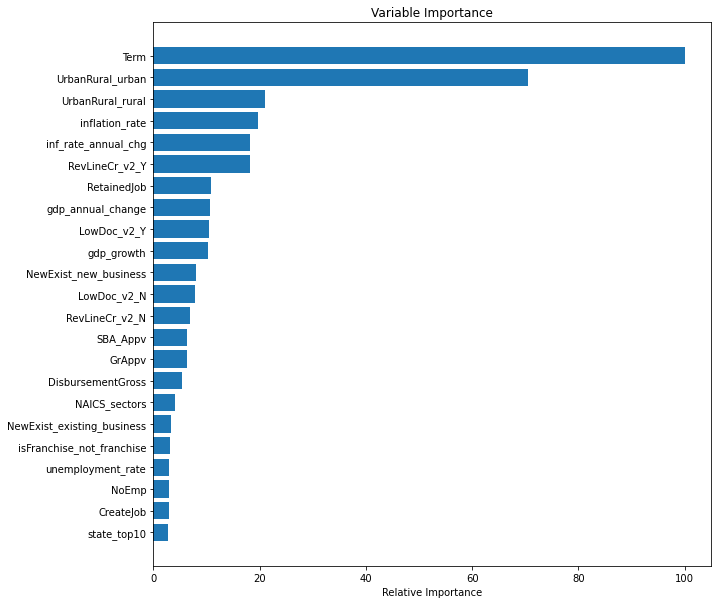

In [27]:
createFeatureImportanceChart(xgb_mod, features, X_train_ss, y_train_ss)

**Append Results**

In [28]:
new_model_results, best_model_params = appendModelingResults(new_model_results, best_model_params, mod_info,
                                                          xgbc_ss_best_params, matrix, metrics)

### B. Robust Scaler

In [29]:
mod_info = {
    'model': 'XGBoost',
    'method': 'Grid Search',
    'scaler': 'Robust'
}

In [30]:
xgbc = XGBClassifier(random_state=42)
xgbc_rs_best_params, y_pred = runGridSearchAnalysis(xgbc, param_grid, X_train_rs, y_train_rs, X_test_rs)

**Evaluation Metrics**

In [31]:
metrics = createClassificationMetrics(y_pred, y_test_rs)
print('Accuracy Score: {}'.format(metrics['acc']))
print('Classification Report: \n{}'.format(metrics['cr']))
print('Matthew\'s Correlation Coefficient: {}'.format(metrics['mcc']))
print('F1 Score: {}'.format(metrics['f1']))

Accuracy Score: 0.9493814486673064
Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223952
     default       0.83      0.87      0.85     44902

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854

Matthew's Correlation Coefficient: 0.8217278540829649
F1 Score: 0.8519231815461618


**Confusion Matrix**

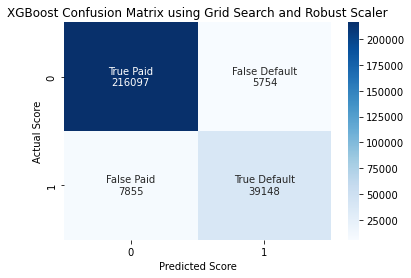

In [32]:
matrix = createConfusionMatrix(y_test_rs, y_pred, mod_info)

**ROC Curve**

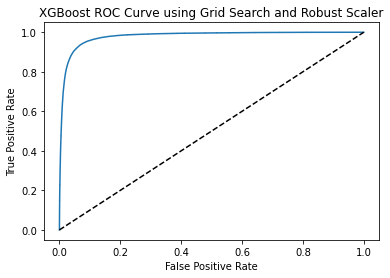

In [33]:
xgb_mod = XGBClassifier(**xgbc_rs_best_params, random_state=42)
metrics['auc'] = drawRocCurve(xgb_mod, X_train_rs, X_test_rs, y_train_rs, y_test_rs, mod_info)

**Feature Importance with Best Params**

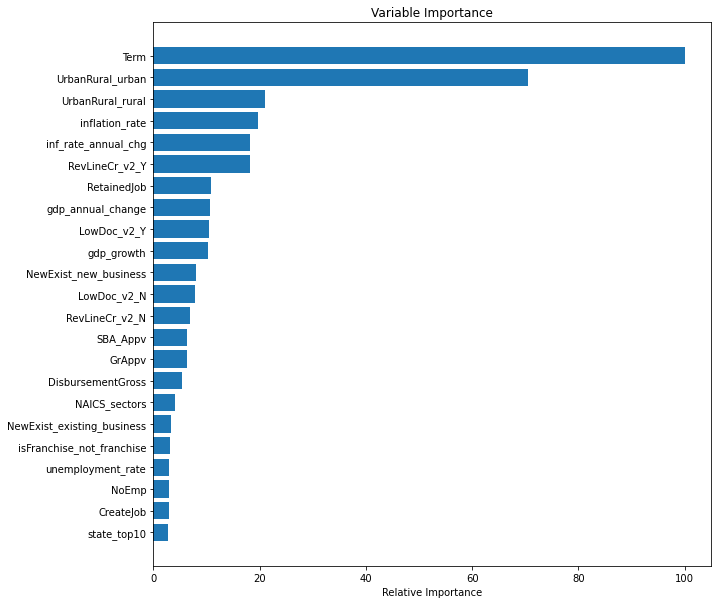

In [34]:
createFeatureImportanceChart(xgb_mod, features, X_train_rs, y_train_rs)

**Append Results**

In [35]:
new_model_results, best_model_params = appendModelingResults(new_model_results, best_model_params, mod_info,
                                                          xgbc_rs_best_params, matrix, metrics)

## 7. Bayesian Optimization

In [36]:
dg = {
    'learning_rate': [0.1, 1],
    'n_estimators': [50, 100],
    'max_depth': [3, 10]
}
ss = {
    'learning_rate': (0,1),
    'n_estimators': (0,1),
    'max_depth': (0,1)
}

### A. Standard Scaler

In [37]:
mod_info = {
    'model': 'XGBoost',
    'method': 'Bayesian Optimization',
    'scaler': 'Standard'
}

In [38]:
xgbc_bo_ss_params = obtain_best_bayes_model(XGBClassifier, X_train_ss, y_train_ss, dg, ss)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  1        |  0.8508   |  0.3745   |  0.9507   |  0.732    |
|  2        |  0.8187   |  0.5987   |  0.156    |  0.156    |
|  3        |  0.8508   |  0.05808  |  0.8662   |  0.6011   |
|  4        |  0.827    |  0.7081   |  0.02058  |  0.9699   |
|  5        |  0.8187   |  0.8324   |  0.2123   |  0.1818   |
|  6        |  0.8508   |  0.0      |  1.0      |  1.0      |
|  7        |  0.8442   |  0.0      |  1.0      |  0.0      |
|  8        |  0.8289   |  1.0      |  1.0      |  1.0      |
|  9        |  0.7728   |  0.0      |  0.478    |  1.0      |
|  10       |  0.8442   |  0.2695   |  1.0      |  0.3731   |
|  11       |  0.8508   |  0.07901  |  0.8695   |  0.6275   |
|  12       |  0.8315   |  1.0      |  1.0      |  0.0      |
|  13       |  0.7253   |  0.0      |  0.4993   |  0.0      |
|  14       |  0.8315   |  0.804    |  1.0      |  0.4983   |
|  15   

In [39]:
xgbc_bo_ss_mod1 = XGBClassifier(**xgbc_bo_ss_params, random_state=42)
y_pred = createModel(xgbc_bo_ss_mod1, X_train_ss, y_train_ss, X_test_ss)

**Evaluation Metrics**

In [40]:
metrics = createClassificationMetrics(y_pred, y_test_ss)
print('Accuracy Score: {}'.format(metrics['acc']))
print('Classification Report: \n{}'.format(metrics['cr']))
print('Matthew\'s Correlation Coefficient: {}'.format(metrics['mcc']))
print('F1 Score: {}'.format(metrics['f1']))

Accuracy Score: 0.9493702901946781
Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223951
     default       0.83      0.87      0.85     44903

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854

Matthew's Correlation Coefficient: 0.8216896937293268
F1 Score: 0.8518921506756905


**Confusion Matrix**

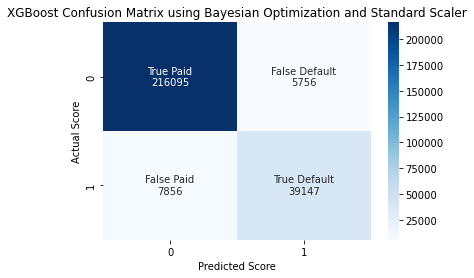

In [41]:
matrix = createConfusionMatrix(y_test_ss, y_pred, mod_info)

**ROC Curve**

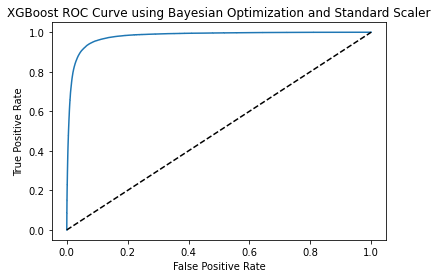

In [42]:
metrics['auc'] = drawRocCurve(xgbc_bo_ss_mod1, X_train_ss, X_test_ss, y_train_ss, y_test_ss, mod_info)

**Feature Importance with Best Params**

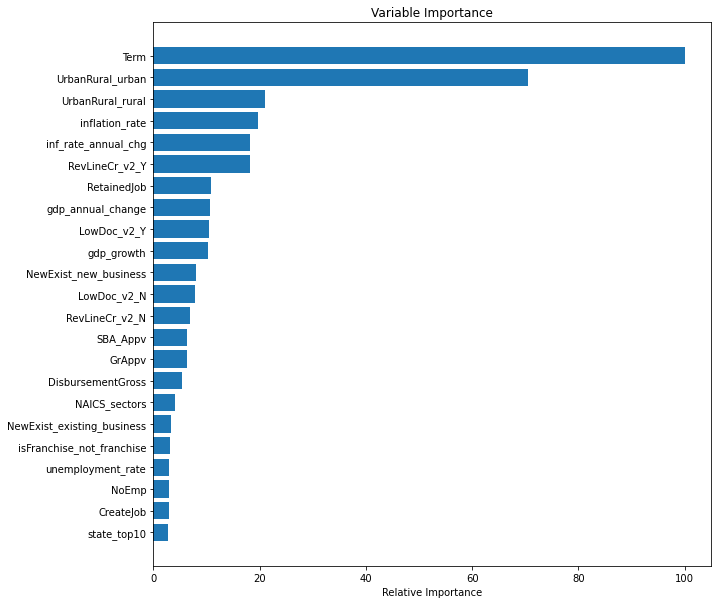

In [43]:
createFeatureImportanceChart(xgbc_bo_ss_mod1, features, X_train_ss, y_train_ss)

**Append Results**

In [44]:
new_model_results, best_model_params = appendModelingResults(new_model_results, best_model_params, mod_info,
                                                          xgbc_bo_ss_params, matrix, metrics)

### B. Robust Scaler

In [45]:
mod_info = {
    'model': 'XGBoost',
    'method': 'Bayesian Optimization',
    'scaler': 'Robust'
}

In [46]:
xgbc_bo_rs_params = obtain_best_bayes_model(XGBClassifier, X_train_rs, y_train_rs, dg, ss)

|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
|  1        |  0.8508   |  0.3745   |  0.9507   |  0.732    |
|  2        |  0.8187   |  0.5987   |  0.156    |  0.156    |
|  3        |  0.8508   |  0.05808  |  0.8662   |  0.6011   |
|  4        |  0.827    |  0.7081   |  0.02058  |  0.9699   |
|  5        |  0.8187   |  0.8324   |  0.2123   |  0.1818   |
|  6        |  0.8508   |  0.0      |  1.0      |  1.0      |
|  7        |  0.8442   |  0.0      |  1.0      |  0.0      |
|  8        |  0.8289   |  1.0      |  1.0      |  1.0      |
|  9        |  0.7728   |  0.0      |  0.4781   |  1.0      |
|  10       |  0.8442   |  0.2695   |  1.0      |  0.3732   |
|  11       |  0.8508   |  0.07901  |  0.8695   |  0.6275   |
|  12       |  0.8316   |  1.0      |  1.0      |  0.0      |
|  13       |  0.7253   |  0.0      |  0.4993   |  0.0      |
|  14       |  0.8316   |  0.804    |  1.0      |  0.4983   |
|  15   

In [47]:
xgbc_bo_rs_mod1 = XGBClassifier(**xgbc_bo_rs_params, random_state=42)
y_pred = createModel(xgbc_bo_rs_mod1, X_train_rs, y_train_rs, X_test_rs)

**Evaluation Metrics**

In [48]:
metrics = createClassificationMetrics(y_pred, y_test_rs)
print('Accuracy Score: {}'.format(metrics['acc']))
print('Classification Report: \n{}'.format(metrics['cr']))
print('Matthew\'s Correlation Coefficient: {}'.format(metrics['mcc']))
print('F1 Score: {}'.format(metrics['f1']))

Accuracy Score: 0.9493814486673064
Classification Report: 
              precision    recall  f1-score   support

        paid       0.97      0.96      0.97    223952
     default       0.83      0.87      0.85     44902

    accuracy                           0.95    268854
   macro avg       0.90      0.92      0.91    268854
weighted avg       0.95      0.95      0.95    268854

Matthew's Correlation Coefficient: 0.8217278540829649
F1 Score: 0.8519231815461618


**Confusion Matrix**

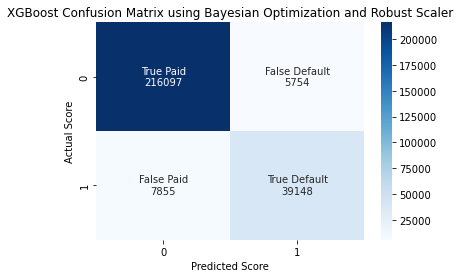

In [49]:
matrix = createConfusionMatrix(y_test_rs, y_pred, mod_info)

**ROC Curve**

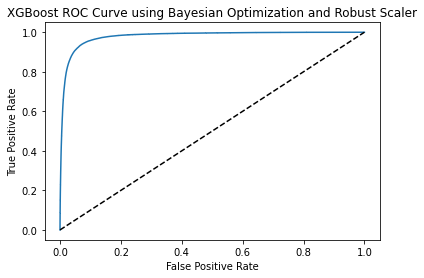

In [50]:
metrics['auc'] = drawRocCurve(xgbc_bo_rs_mod1, X_train_rs, X_test_rs, y_train_rs, y_test_rs, mod_info)

**Feature Importance with Best Params**

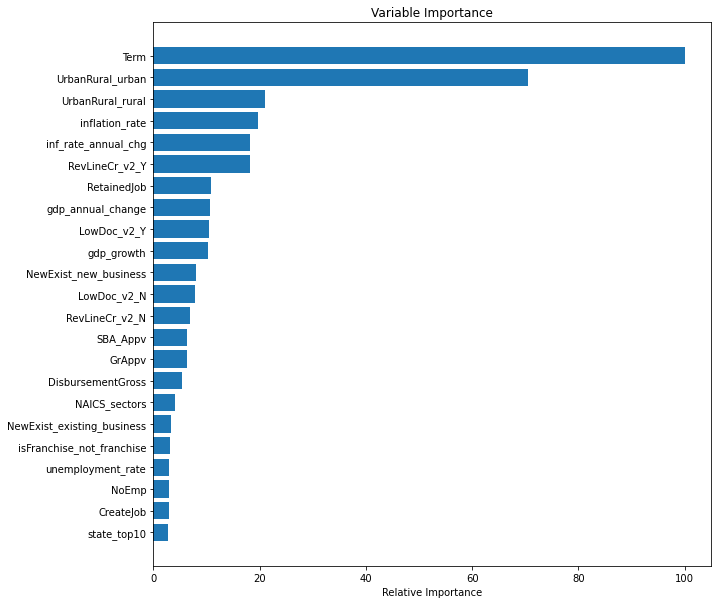

In [51]:
createFeatureImportanceChart(xgbc_bo_rs_mod1, features, X_train_rs, y_train_rs)

**Append Results**

In [52]:
new_model_results, best_model_params = appendModelingResults(new_model_results, best_model_params, mod_info,
                                                          xgbc_bo_rs_params, matrix, metrics)

## 8. Save Results

In [63]:
model_results = pd.read_csv('./results/model_results.csv')
new_model_results = pd.DataFrame(new_model_results)
model_results = pd.concat([model_results, new_model_results])
model_results = model_results.reset_index(drop=True)

In [64]:
model_results.to_csv('./results/model_results.csv', index=False, encoding='utf-8')
with open('./results/best_params.json', 'w') as outfile:
    json.dump(best_model_params, outfile, indent=4)